In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("/home/amjad-alhadeed/Downloads/911.csv") 

## Data Preparation and Cleaning

In [3]:
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1


In [4]:
# Display the summary of the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
# Display the first 5 rows of the DataFrame
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
# Count the number of missing values in each column
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [7]:
# Fill missing values in 'zip', 'twp', and 'addr'
df['zip'] = df['zip'].fillna('Unknown')
df['twp'] = df['twp'].fillna('Unknown Township')
df['addr'] = df['addr'].fillna('Address Unknown')

In [8]:
# Display the top 5 most frequent zip codes
df['zip'].value_counts().head()

zip
Unknown    12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
Name: count, dtype: int64

In [9]:
# Display the top 5 most frequent twp codes
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [10]:
# Extract all titles and count the number of unique titles in the DataFrame
unique_titles = df['title']
unique_title_count = df['title'].nunique()
unique_title_count

110

In [11]:
# Create a new col called 'Reason'
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,Unknown,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [12]:
# Count occurrences for each reason
reason_counts = df['Reason'].value_counts()
reason_counts

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

In [13]:
# check the dtype
print(df['timeStamp'].dtype)

object


In [14]:
# Convert the 'timeStamp' column to datetime then extract the hour, month, and day of the week into new columns
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)

df['Month'] = df['timeStamp'].apply(lambda time: time.month)

df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,Unknown,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [15]:
# Mapping the data
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

df['Day of Week'] = df['Day of Week'].map(dmap)

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,Unknown,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [16]:
# Access the first timestamp
time = df['timeStamp'].iloc[0]
time.year
time.minute
time.second
time.day
time.month
time.hour
time.dayofweek

3

## Visualization

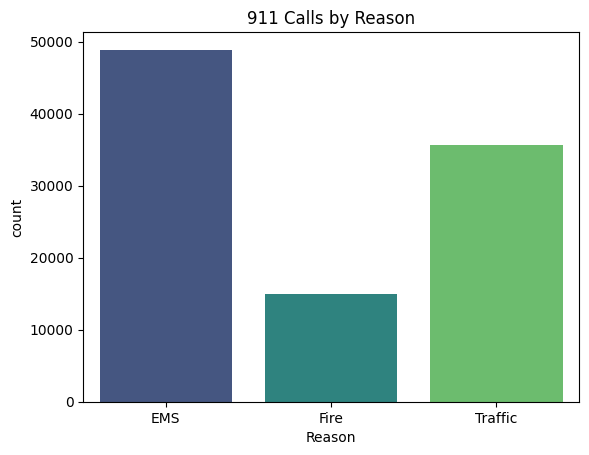

In [17]:
sns.countplot(x='Reason', data=df, hue='Reason', palette='viridis', legend=False)
plt.title('911 Calls by Reason')

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/1.png', dpi=300, bbox_inches='tight') 

plt.show()

In [18]:
# Group the DataFrame by 'Month' 
byMonth = df.groupby('Month').count()

byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969,7969


In [19]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

byDate = df.groupby('Date').count()

In [20]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

day_hour_group = df.groupby(['Day of Week', 'Hour']).count()['title'].unstack()

day_hour_group.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


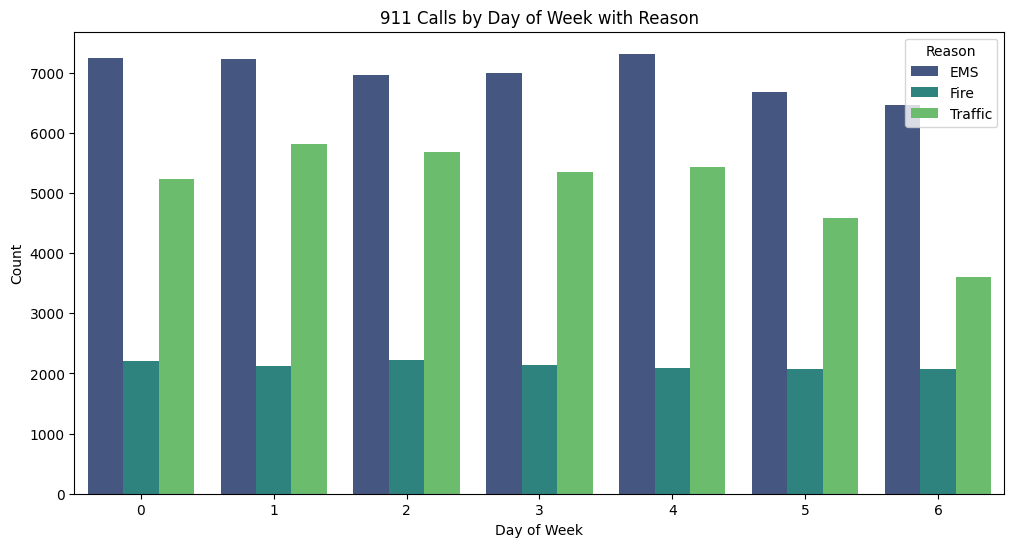

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day of Week', hue='Reason', data=df, palette='viridis')

plt.title('911 Calls by Day of Week with Reason')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.legend(title='Reason')

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/2.png', dpi=300, bbox_inches='tight')

plt.show()

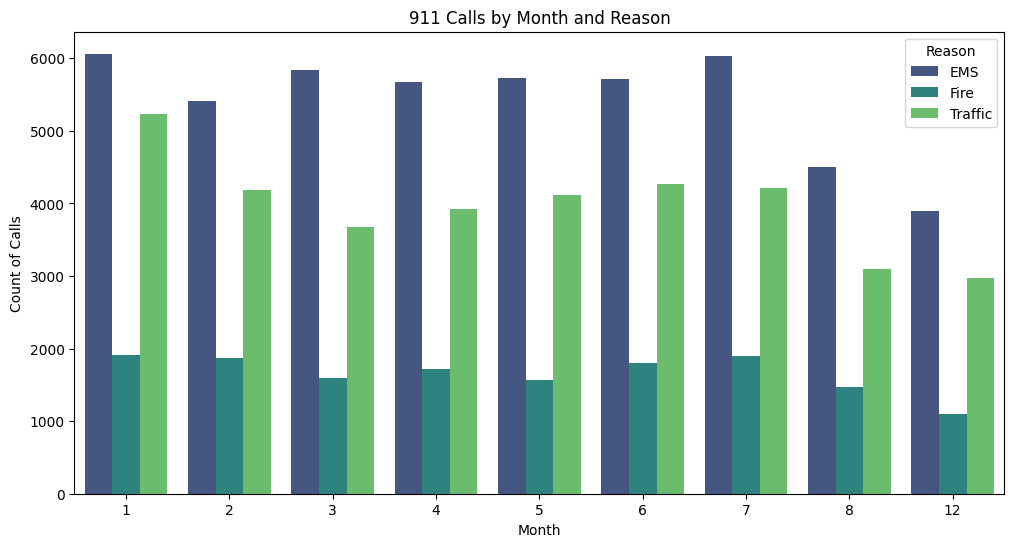

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Reason', data=df, palette='viridis')

plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Count of Calls')
plt.legend(title='Reason')

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/3.png', dpi=300, bbox_inches='tight')

plt.show()

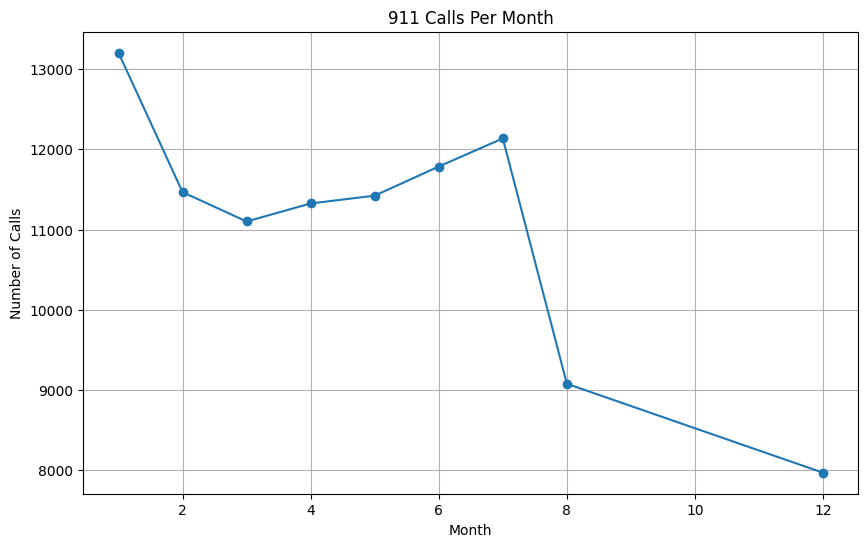

In [23]:
plt.figure(figsize=(10, 6))

plt.plot(byMonth.index, byMonth['title'], marker='o')

plt.title('911 Calls Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)


plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/4.png', dpi=300, bbox_inches='tight') 


plt.show()

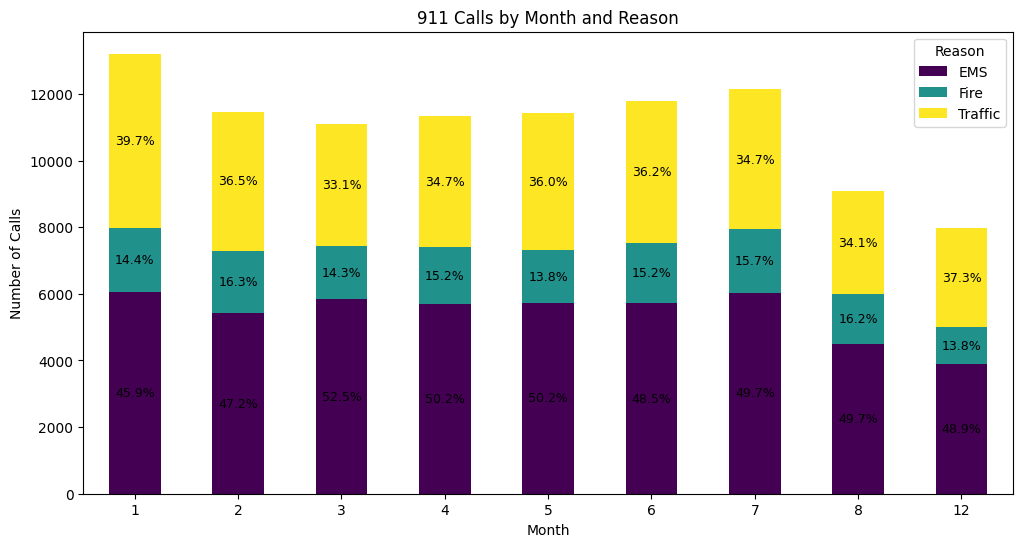

In [34]:
monthly_reason_group = df.groupby(['Month', 'Reason']).size().unstack(fill_value=0)

monthly_reason_percent = monthly_reason_group.divide(monthly_reason_group.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 6))
monthly_reason_group.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)

for i, month in enumerate(monthly_reason_percent.index):
    bottom = 0
    for reason in monthly_reason_group.columns:
        value = monthly_reason_group.loc[month, reason]
        percentage = monthly_reason_percent.loc[month, reason]
        ax.text(i, bottom + value / 2, f'{percentage:.1f}%', ha='center', va='center', fontsize=9)
        bottom += value

# Save the figure
plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/4.4.png', dpi=300, bbox_inches='tight')

# Set plot title and labels
plt.title('911 Calls by Month and Reason')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(rotation=0)

# Show the plot
plt.show()


<Figure size 800x600 with 0 Axes>

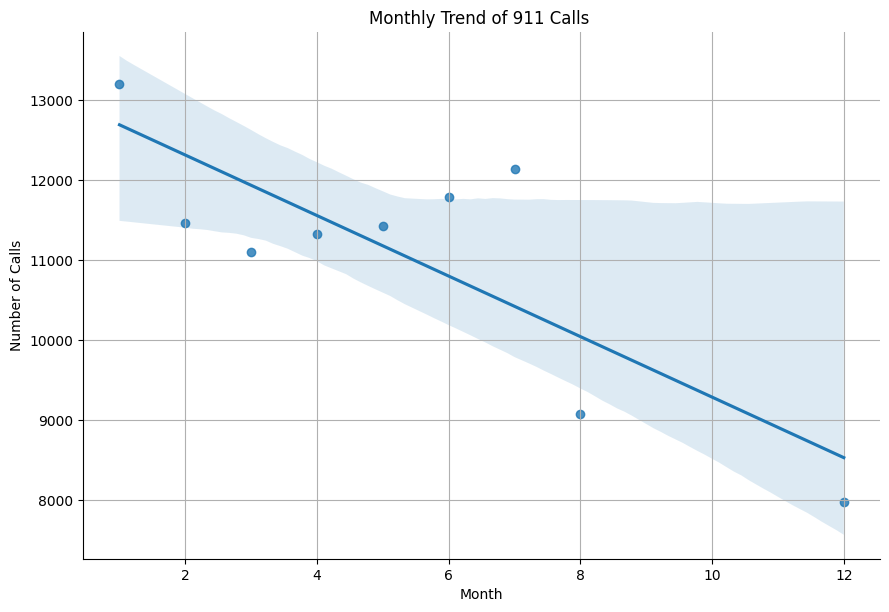

In [25]:
byMonth_reset = byMonth.reset_index()

plt.figure(figsize=(8, 6))
sns.lmplot(x='Month', y='title', data=byMonth_reset, height=6, aspect=1.5)

plt.title('Monthly Trend of 911 Calls ')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/5.png', dpi=300, bbox_inches='tight') 


plt.show()

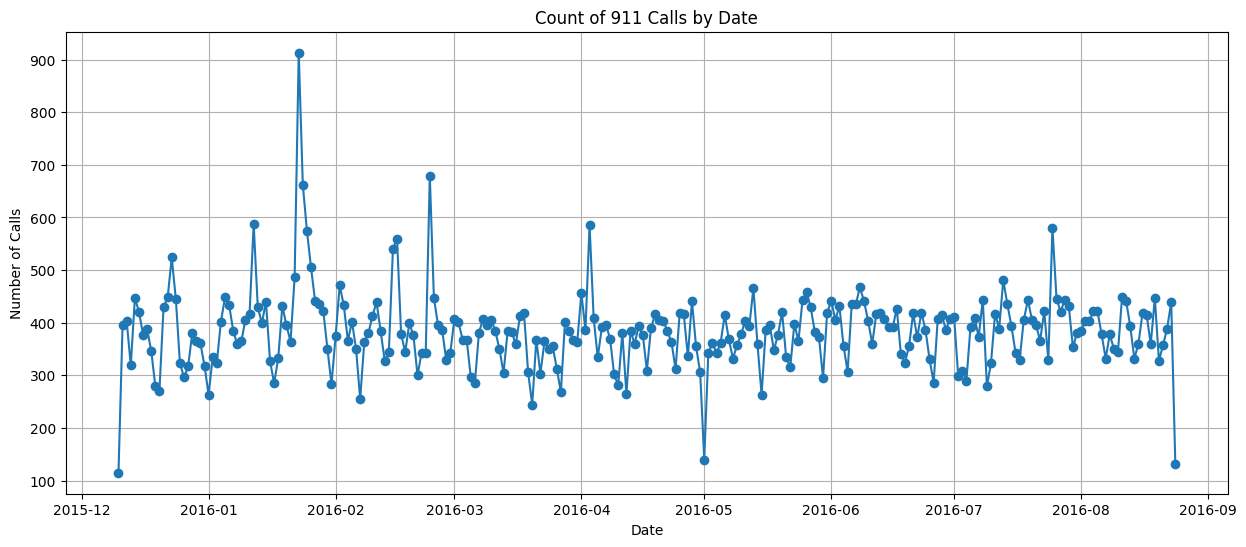

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(byDate.index, byDate['title'], marker='o')

plt.title('Count of 911 Calls by Date')
plt.xlabel('Date')
plt.ylabel('Number of Calls')

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/6.png', dpi=300, bbox_inches='tight') 

plt.grid(True)
plt.show()

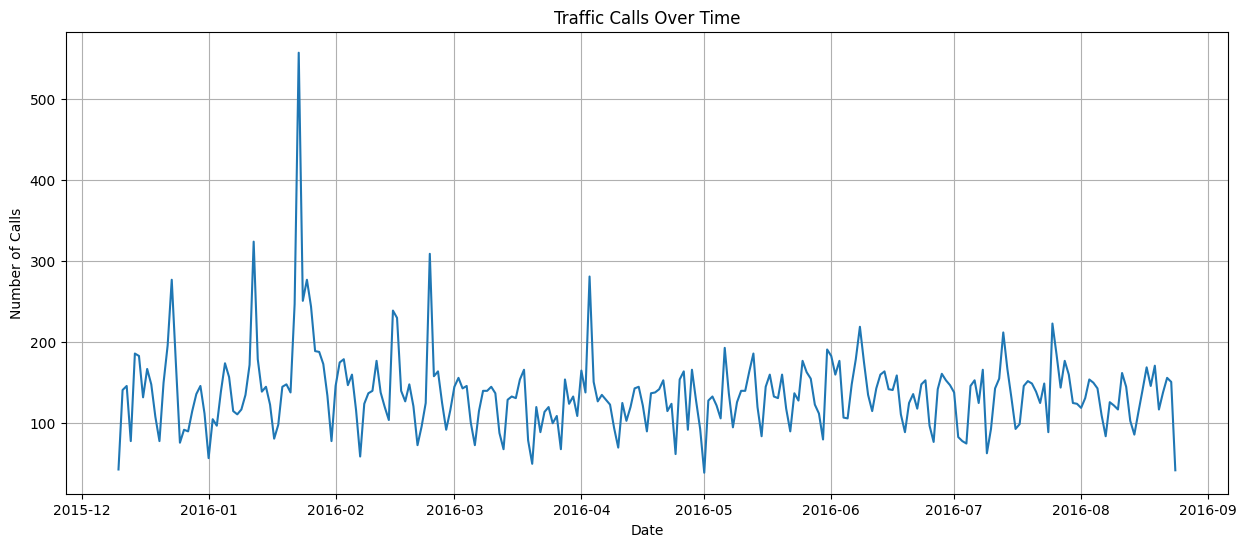

In [27]:
plt.figure(figsize=(15, 6))
traffic_data = df[df['Reason'] == 'Traffic'].groupby('Date').count()
plt.plot(traffic_data.index, traffic_data['title'], label='Traffic')
plt.title('Traffic Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/7.png', dpi=300, bbox_inches='tight') 

plt.show()

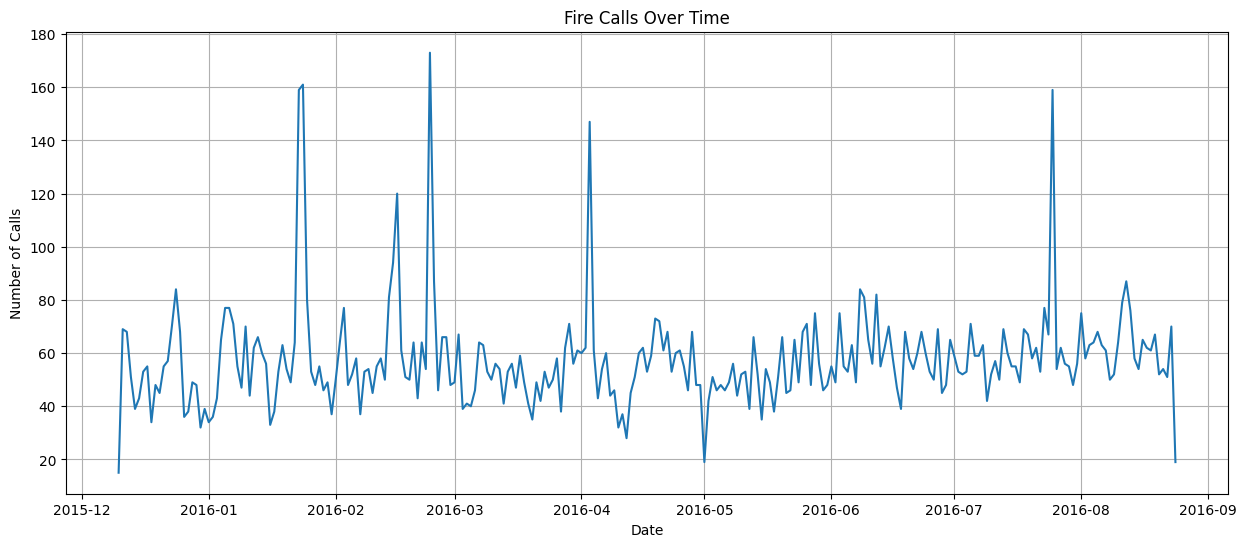

In [28]:
plt.figure(figsize=(15, 6))
fire_data = df[df['Reason'] == 'Fire'].groupby('Date').count()
plt.plot(fire_data.index, fire_data['title'], label='Fire')
plt.title('Fire Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/8.png', dpi=300, bbox_inches='tight') 

plt.show()

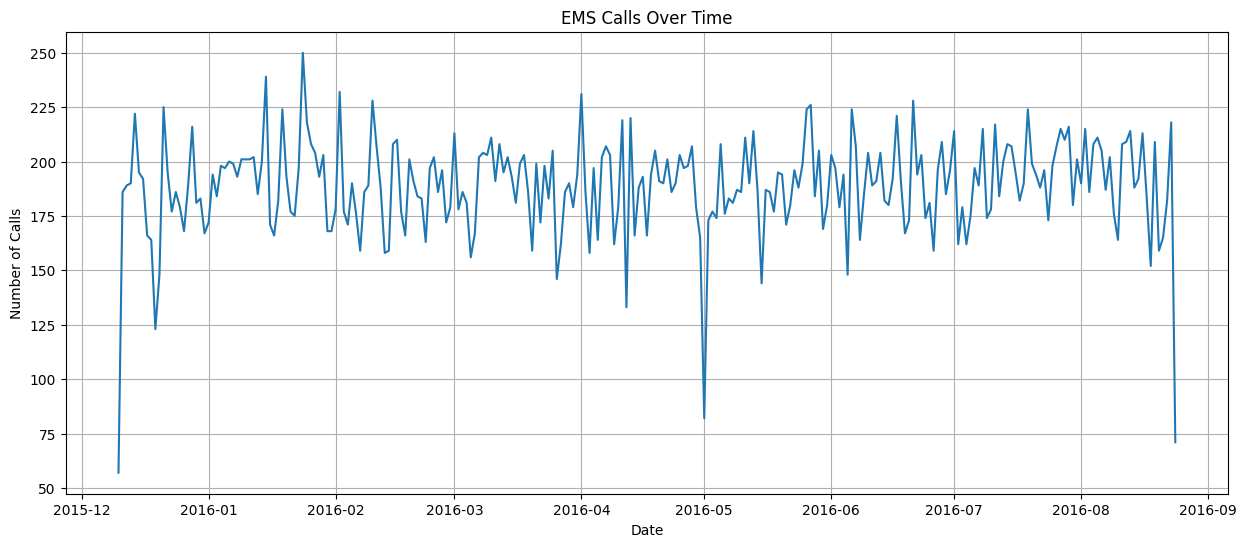

In [29]:
plt.figure(figsize=(15, 6))
ems_data = df[df['Reason'] == 'EMS'].groupby('Date').count()
plt.plot(ems_data.index, ems_data['title'], label='EMS')
plt.title('EMS Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.grid(True)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/9.png', dpi=300, bbox_inches='tight') 

plt.show()

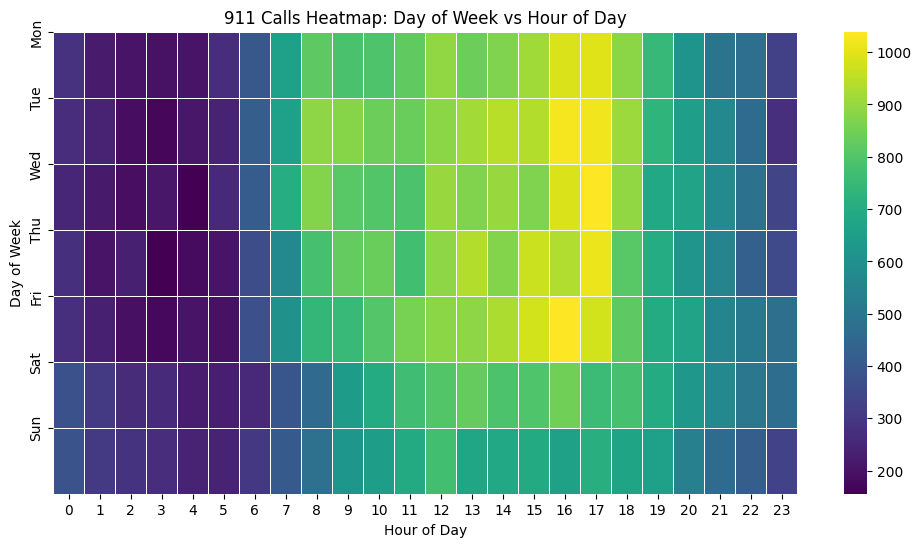

In [30]:
day_names = [dmap.get(day) for day in day_hour_group.index]  

plt.figure(figsize=(12, 6))
sns.heatmap(day_hour_group, cmap='viridis', annot=False, linewidths=.5)

plt.title('911 Calls Heatmap: Day of Week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(ticks=range(len(day_names)), labels=day_names)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/10.png', dpi=300, bbox_inches='tight') 

plt.show()

<Figure size 1200x600 with 0 Axes>

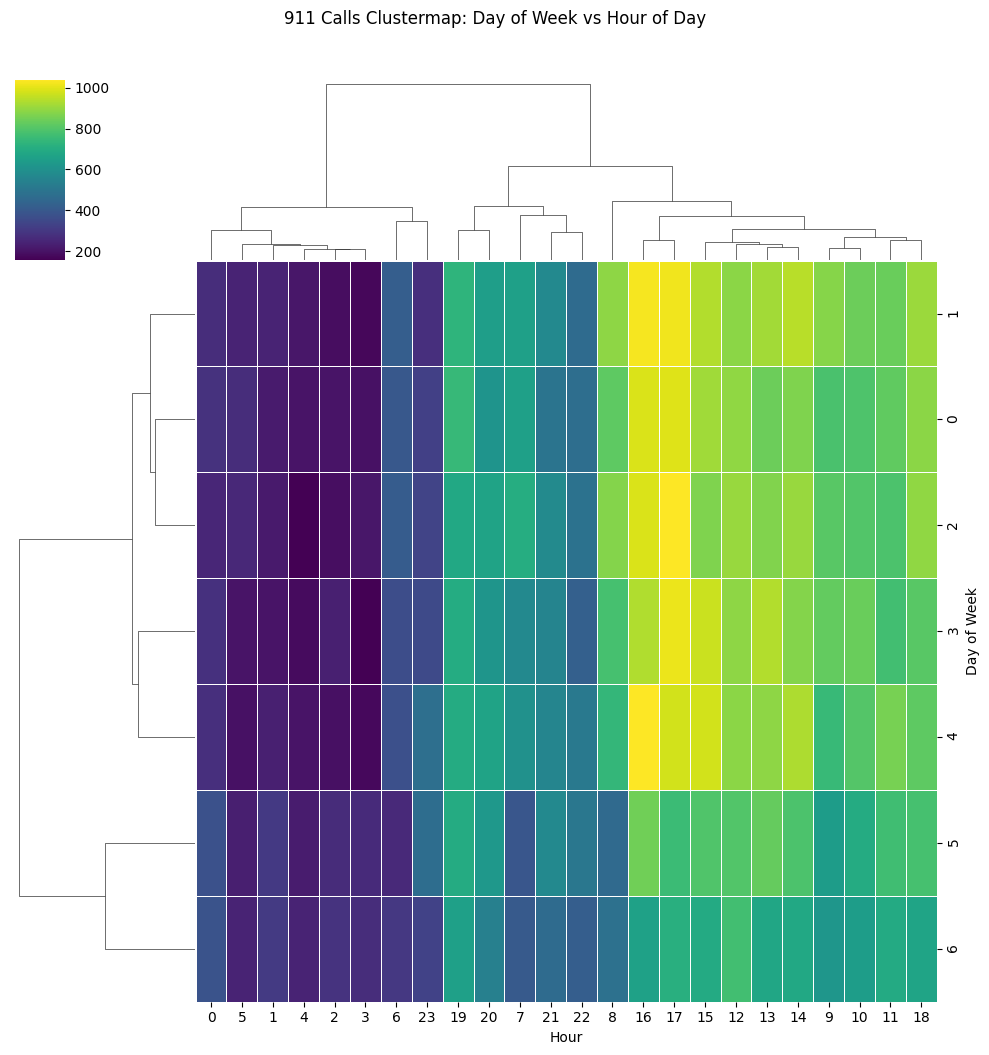

In [31]:
plt.figure(figsize=(12, 6))
sns.clustermap(day_hour_group, cmap='viridis', linewidths=.5)
plt.suptitle('911 Calls Clustermap: Day of Week vs Hour of Day', y=1.05)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/11.png', dpi=300, bbox_inches='tight') 

plt.show()

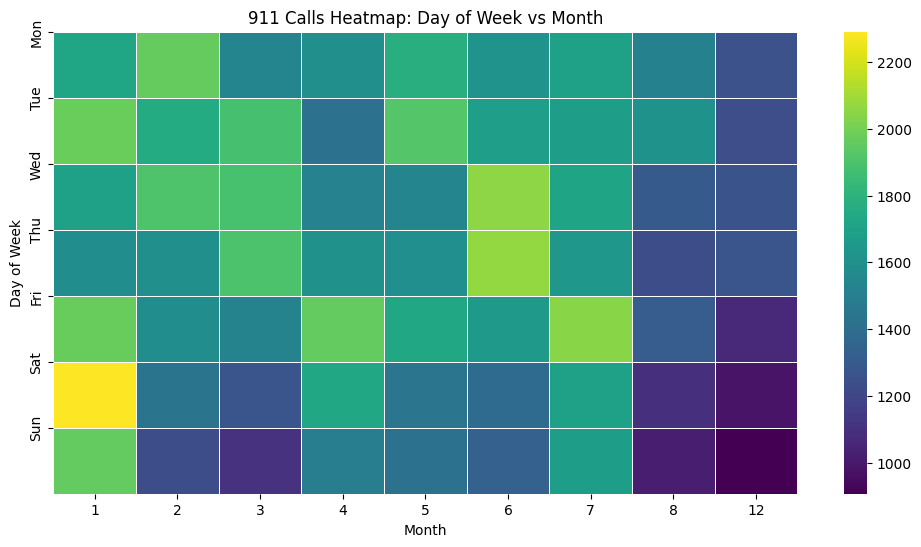

In [32]:
day_month_group = df.groupby(['Day of Week', 'Month']).count()['title'].unstack()
day_names = [dmap.get(day) for day in day_month_group.index] 

plt.figure(figsize=(12, 6))
sns.heatmap(day_month_group, cmap='viridis', annot=False, linewidths=.5, cbar=True )

plt.title('911 Calls Heatmap: Day of Week vs Month')
plt.xlabel('Month')
plt.ylabel('Day of Week')
plt.yticks(ticks=range(len(day_names)), labels=day_names)  

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/12.png', dpi=300, bbox_inches='tight') 

plt.show()

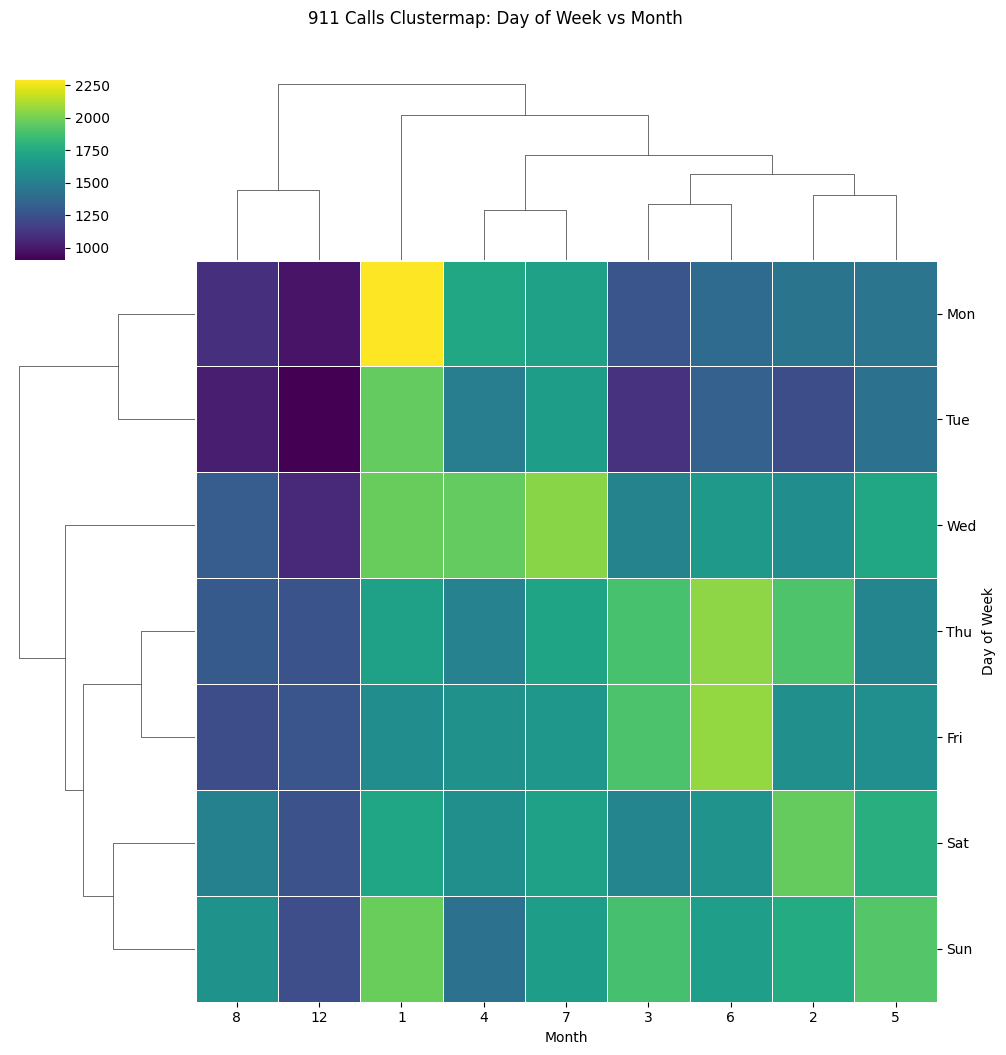

In [33]:
day_names = [dmap.get(day) for day in day_month_group.index]

clustermap = sns.clustermap(day_month_group, cmap='viridis', linewidths=.5)

clustermap.ax_heatmap.set_yticklabels(day_names, rotation=0)

plt.suptitle('911 Calls Clustermap: Day of Week vs Month', y=1.05)

plt.savefig('/home/amjad-alhadeed/Desktop/PLots/plots2/13.png', dpi=300, bbox_inches='tight') 

plt.show()